In [1]:
%matplotlib inline
import cv2
import numpy as np
from matplotlib import pyplot as plt
import datetime
import glob
import os

import sys
from paths import Paths
paths = Paths()
sys.path.append(paths.scripts_root)
import util

import pandas as pd

%load_ext autoreload
%autoreload 2

# Display entire width of browser
from IPython.display import display, HTML
display(HTML(data="""
<style>
    div#notebook-container    { width: 95%; }
    div#menubar-container     { width: 65%; }
    div#maintoolbar-container { width: 99%; }
</style>
"""))

paths.print_paths()


Paths defined in paths module:
 paths.tmp_root: /Users/trafferty/data/tmp
 paths.results_root: /Users/trafferty/data/results
 paths.data_root: /Users/trafferty/data
 paths.images_root: /Users/trafferty/data/images
 paths.mii_home: /Users/trafferty/dev
 paths.scripts_root: /Users/trafferty/data/scripts
 paths.tmp_dir: /Users/trafferty/tmp
 paths.inhouse: /Users/trafferty/dev/src/inhouse
 paths.notebook_root: /Users/trafferty/data/notebooks
 paths.ws_dir: /Users/trafferty/workspace
 paths.projects_root: /Users/trafferty/data/projects


In [364]:
dat_root = "%s" % (paths.tmp_root) 
temp_dat_files = glob.glob("%s/temp_*.dat" % (dat_root))

use_ts_as_index = True

temp_data_list = []

# Read each dat file, convert the 'timestamp' column to a pandas datetime
for idx, f in enumerate(temp_dat_files):
    name = os.path.basename(f).split('.')[0]
    
    if 1:
        df_all = pd.read_csv(f)
        
        # drop the celsius version of temp
        df = df_all.drop(' temp (C)', axis=1)
        
        ## uncomment to make timestamp just the time part
        #df['timestamp'] = pd.to_datetime(df['timestamp'], format="%Y-%m-%d %H:%M:%S").apply(lambda x: x.time())
        
        ## uncomment to convert to just the time
        #df['timestamp'] = df['timestamp'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d %H:%M:%S").strftime('%H:%M:%S'))
        
        # use timestamp as index?
        if use_ts_as_index:
            df.set_index('timestamp', inplace=True)
            df.columns = [ name]
        else:
            df.columns = ['timestamp', name]

    else:
        df = pd.read_csv(f, parse_dates=[0], infer_datetime_format=True)
        df=df.drop(' temp (C)', axis=1)
        df.set_index('timestamp', inplace=True)
        df.columns = [ name]
        
    temp_data_list.append( (name, df) )
    
    print("DF: ", name)
    df.info()
    if use_ts_as_index:
        l = len(df.index) - 1
        print(" timestamps: %s - %s " % (df.index[0], df.index[l]))
    else:
        l = len(df.timestamp) - 1
        print(" timestamps: %s - %s " % (df.timestamp[1], df.timestamp[l]))
    print("----------------------- ")
    
#     if idx == 0:
#         print("-------Setting")
#         df_combined = df
#     else:
#         print("-------Joining")
#         df_combined.join(df, how='outer', rsuffix='_%d'%idx)


#     ts =df['timestamp'][3]
#     print(type(ts))
#     min_time, max_time = 20:00, -0.25
#     dispence_trace = df.loc[(df['timestamp'] > min_time) & (df['timestamp'] < max_time)]
#     xticks = x=np.arange(min_time, max_time, (max_time-min_time)/50.0)
#     df.set_index('timestamp', inplace=True)
#     df.plot(rot=45)


DF:  temp_zanders_room
<class 'pandas.core.frame.DataFrame'>
Index: 5192 entries, 2018-07-07 17:49:53 to 2018-07-08 09:24:47
Data columns (total 1 columns):
temp_zanders_room    5192 non-null float64
dtypes: float64(1)
memory usage: 81.1+ KB
 timestamps: 2018-07-07 17:49:53 - 2018-07-08 09:24:47 
----------------------- 
DF:  temp_guest_room
<class 'pandas.core.frame.DataFrame'>
Index: 7161 entries, 2018-07-05 21:07:25 to 2018-07-06 18:37:00
Data columns (total 1 columns):
temp_guest_room    7161 non-null float64
dtypes: float64(1)
memory usage: 111.9+ KB
 timestamps: 2018-07-05 21:07:25 - 2018-07-06 18:37:00 
----------------------- 
DF:  temp_master_bedroom2
<class 'pandas.core.frame.DataFrame'>
Index: 4702 entries, 2018-07-01 17:52:43 to 2018-07-02 07:59:23
Data columns (total 1 columns):
temp_master_bedroom2    4702 non-null float64
dtypes: float64(1)
memory usage: 73.5+ KB
 timestamps: 2018-07-01 17:52:43 - 2018-07-02 07:59:23 
----------------------- 
DF:  temp_under_thermostat
<

temp_zanders_room: 4331 pts
temp_guest_room: 3957 pts
temp_master_bedroom2: 3995 pts
temp_under_thermostat: 4001 pts
temp_master_bedroom: 4331 pts
temp_scouts_room: 4220 pts


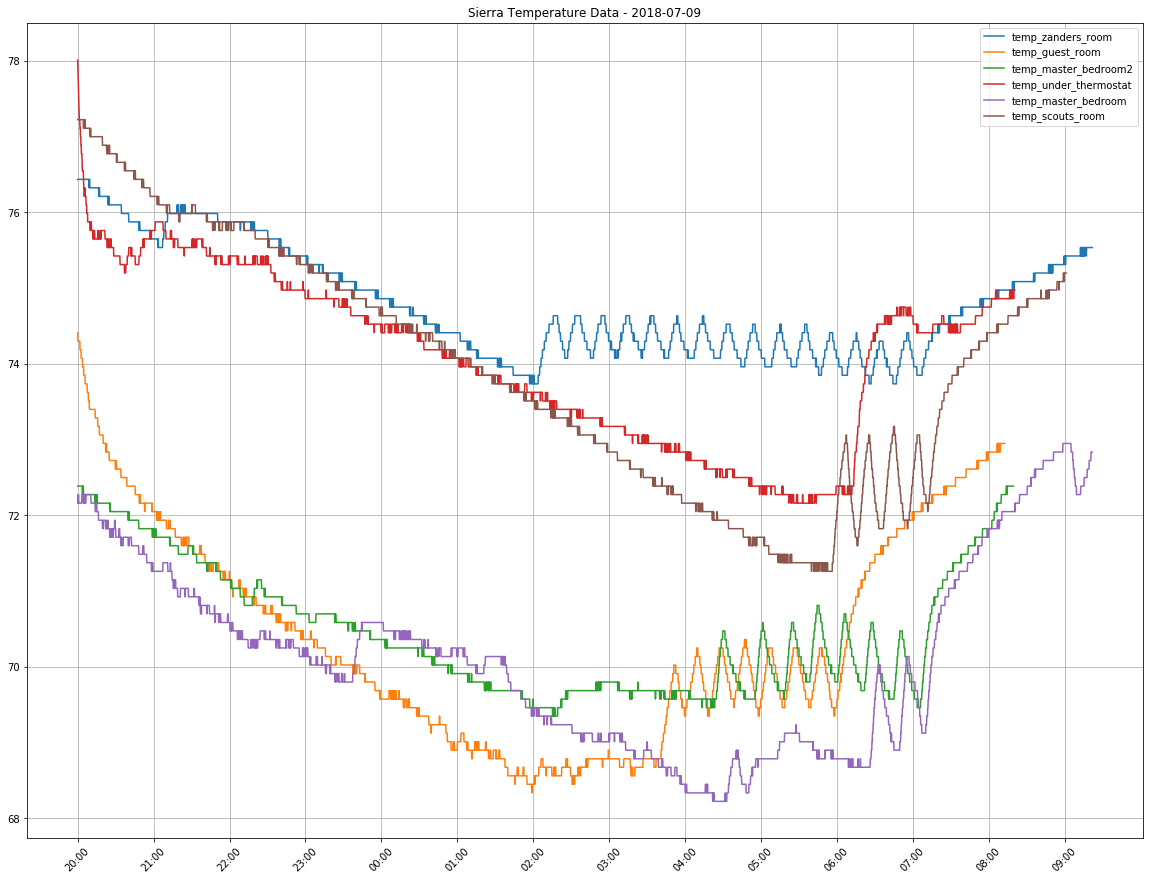

In [480]:
start_hour = 20
end_hour = 9

fig, ax = plt.subplots(figsize = (20,15))
fig.canvas.draw()

for temp_data_set in temp_data_list:
    name = temp_data_set[0]
    temp_data = temp_data_set[1]

    df_now = temp_data
    temp_data_idx = temp_data.index[0]
    temp_data_dt = pd.to_datetime(temp_data_idx)

    hours = []
    if start_hour < end_hour:
        start_ts = temp_data_dt.replace(hour=start_hour, minute=0, second=0)
        end_ts = temp_data_dt.replace(hour=end_hour, minute=0, second=0)
        start_ts = start_ts.strftime("%Y-%m-%d %H:%M:%S")
        end_ts = end_ts.strftime("%Y-%m-%d %H:%M:%S")

        total_hours = start_hour - end_hour
        for h in range(total_hours+1):
            h_str = datetime.time(start_hour+h, 0, 0).strftime('%H:%M')
            hours.append(h_str)
    else:
        start_ts = temp_data_dt.replace(hour=start_hour, minute=0, second=0)
        end_ts = temp_data_dt.replace(hour=end_hour, minute=0, second=0) + datetime.timedelta(days=1)
        start_ts = start_ts.strftime("%Y-%m-%d %H:%M:%S")
        end_ts = end_ts.strftime("%Y-%m-%d %H:%M:%S")

        total_hours = (24-start_hour) + end_hour
        for h in range((24-start_hour)):
            h_str = datetime.time(start_hour+h, 0, 0).strftime('%H:%M')
            hours.append(h_str)
        for h in range((end_hour+1)):
            h_str = datetime.time(h, 0, 0).strftime('%H:%M')
            hours.append(h_str)

    temp_data_sub = temp_data[start_ts:end_ts]
    temps = temp_data_sub.iloc[:,0:].values

    ax.plot(temps, label=name)
    ax.grid(True)

    print("%s: %d pts" % (name, len(temps)))

    x = [i for i in range(0, len(temps), int(len(temps)/total_hours))]

plt.xticks(x, hours, rotation=45)
plt.legend(loc='upper right')
plt.title('Sierra Temperature Data - %s' % datetime.datetime.now().strftime("%Y-%m-%d"))
plt.show()
fig.savefig('../results/Sierra_Temperatures_%s.pdf' % datetime.datetime.now().strftime("%Y-%m-%d"))

## All of the below is just trying different ways to combine the different datasets into single pandas dataframe. 
### Ran into lots of problems with indexing, etc.  maybe someday i'll figure this out.

In [365]:
df1 = temp_data_list[0][1]
df2 = temp_data_list[1][1]
df3 = temp_data_list[2][1]

#df1.join(df2, how='inner')

#df4 =df1.merge(df2)
df2.head()


,temp_guest_room
timestamp,
2018-07-05 21:07:25,74.4116
2018-07-05 21:07:36,74.3000
2018-07-05 21:07:47,74.3000
2018-07-05 21:07:58,74.3000
2018-07-05 21:08:08,74.3000


In [460]:
df_now = temp_data_list[4][1]
df1_idx = df_now.index[0]
df1_dt = pd.to_datetime(df1_idx)
#df1_dt = df1_idx.to_pydatetime()
print(df1_dt)
# df1.set_index('timestamp', inplace=True)
#df1.index[4:8]

start_hour = 21
end_hour = 8

start_ts = df1_dt.replace(hour=start_hour, minute=0, second=0)
end_ts = df1_dt.replace(hour=end_hour, minute=0, second=0) + datetime.timedelta(days=1)

start_ts = start_ts.strftime("%Y-%m-%d %H:%M:%S")
end_ts = end_ts.strftime("%Y-%m-%d %H:%M:%S")

print(type(start_ts))
print(type(end_ts))


2018-06-30 19:14:14
<class 'str'>
<class 'str'>


In [476]:
datetime.datetime.now().strftime("%Y-%m-%d")

'2018-07-09'

Num pts:  3664
total hours:  11
hours:  ['21:00', '22:00', '23:00', '00:00', '01:00', '02:00', '03:00', '04:00', '05:00', '06:00', '07:00', '08:00']
[0, 333, 666, 999, 1332, 1665, 1998, 2331, 2664, 2997, 3330, 3663]


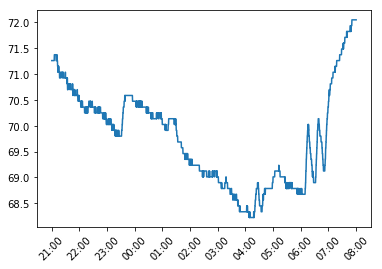

In [461]:
df_sub= df_now[start_ts:end_ts]


if 0:
    ax = df_sub.plot()
    f = lambda x: datetime.datetime.strptime(x, "%Y-%m-%d %H:%M:%S").strftime('%H:%M')
    #ax.set_xticklabels([ f(x.get_text()) for x in ax.get_xticklabels()])
    plt.show()
else:
    temps = df_sub.iloc[:,0:].values
    
    num_pts = len(temps)
    print("Num pts: ", num_pts)
    
    hours = []
    if start_hour < end_hour:
        total_hours = start_hour - end_hour
        for h in range(total_hours+1):
            h_str = datetime.time(start_hour+h, 0, 0).strftime('%H:%M')
            hours.append(h_str)
    else:
        total_hours = (24-start_hour) + end_hour
        for h in range((24-start_hour)):
            h_str = datetime.time(start_hour+h, 0, 0).strftime('%H:%M')
            hours.append(h_str)
        for h in range((end_hour+1)):
            h_str = datetime.time(h, 0, 0).strftime('%H:%M')
            hours.append(h_str)

    print("total hours: ", total_hours)
    print("hours: ", hours)

    x = [i for i in range(0,num_pts, int(num_pts/11))]
    print(x)

    
    fig, ax = plt.subplots()
    fig.canvas.draw()
    
    ax.plot(temps)
    
    plt.xticks(x, hours, rotation=45)
    
    plt.show()
    
    
#     gap = int(num_pts / 10)
#     print ("gap: ", gap)
#     x = [i for i in range(0,num_pts, int(num_pts/10))]
#     print(x)
    
#     for idx, item in enumerate(ax.get_xticks()):
#         print(idx, ": ", item)
    
    
#     labels = [item.get_text() for item in ax.get_xticklabels()]
#     print("# lables:", len(labels))
#     #labels[1] = 'Testing'

#     #ax.set_xticklabels(labels)

    
#     print(type(temps))
#     print(temps[0:10][0])

#     labels2 = ax.get_xticks()

#     for label in labels:
#         print(label)


In [442]:
hours = []
if start_hour < end_hour:
    total_hours = start_hour - end_hour
    for h in range(total_hours):
        h_str = datetime.time(start_hour+h, 0, 0).strftime('%H:%M')
        hours.append(h_str)
else:
    total_hours = (24-start_hour) + end_hour
    for h in range((24-start_hour)):
        h_str = datetime.time(start_hour+h, 0, 0).strftime('%H:%M')
        hours.append(h_str)
    for h in range((end_hour)):
        h_str = datetime.time(h, 0, 0).strftime('%H:%M')
        hours.append(h_str)


print("total hours: ", total_hours)
print("hours: ", hours)


datetime.time(3, 0, 0).strftime('%H:%M')

x = [i for i in range(0,num_pts, int(num_pts/10))]
print(x)


total hours:  11
hours:  ['21:00', '22:00', '23:00', '00:00', '01:00', '02:00', '03:00', '04:00', '05:00', '06:00', '07:00']
[0, 366, 732, 1098, 1464, 1830, 2196, 2562, 2928, 3294, 3660]


In [436]:
for i in range(0,3662, 366):
    print(i)

0
366
732
1098
1464
1830
2196
2562
2928
3294
3660


In [348]:
hour_start = 21
hour_end = 7
for temp_data in temp_data_list:
    name = temp_data[0]
    df_full = temp_data[1]
    start_dt = df_full.index[0].to_pydatetime()
    start_ts = start_dt.replace(hour=hour_start, minute=1, second=1)
    end_ts = start_dt.replace(hour=hour_end, minute=1, second=1)+ datetime.timedelta(days=1)

    df = df_full[start_ts:end_ts]
    ax = df.plot()
    f = lambda x: datetime.datetime.strptime(x, '%m-%d %H').strftime('%H:%M')
    #ax.set_xticklabels([ f(x.get_text()) for x in ax.get_xticklabels()])
    plt.show()
    

AttributeError: 'int' object has no attribute 'to_pydatetime'

In [15]:
#df1_dt = pd.to_datetime(df1_idx)
df1_dt = df_full.index[0].to_pydatetime()
df1_dt
# df1.set_index('timestamp', inplace=True)
#df1.index[4:8]

start_ts = df1_dt.replace(hour=17, minute=53, second=1)
end_ts = df1_dt.replace(hour=18, minute=53, second=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125000 entries, 0 to 124999
Data columns (total 2 columns):
TIME    125000 non-null float64
CH2     125000 non-null float64
dtypes: float64(2)
memory usage: 1.9 MB


In [160]:
end_ts - start_ts 

hours = [(i, datetime.time(i).strftime('%I %p')) for i in range(24)]
hours

[(0, '12 AM'),
 (1, '01 AM'),
 (2, '02 AM'),
 (3, '03 AM'),
 (4, '04 AM'),
 (5, '05 AM'),
 (6, '06 AM'),
 (7, '07 AM'),
 (8, '08 AM'),
 (9, '09 AM'),
 (10, '10 AM'),
 (11, '11 AM'),
 (12, '12 PM'),
 (13, '01 PM'),
 (14, '02 PM'),
 (15, '03 PM'),
 (16, '04 PM'),
 (17, '05 PM'),
 (18, '06 PM'),
 (19, '07 PM'),
 (20, '08 PM'),
 (21, '09 PM'),
 (22, '10 PM'),
 (23, '11 PM')]

In [350]:
hour_start = 21
hour_end = 7

df1 = temp_data_list[0][1]
df1_name = temp_data_list[0][0]
df2 = temp_data_list[1][1]
df2_name = temp_data_list[1][0]
df3 = temp_data_list[2][1]
df3_name = temp_data_list[2][0]

start_dt = df1.index[0].to_pydatetime()
start_ts = start_dt.replace(hour=hour_start, minute=1, second=1)
end_ts = start_dt.replace(hour=hour_end, minute=1, second=1)+ datetime.timedelta(days=1)
#ds1 = df1[start_ts:end_ts].iloc[:,0]
df1 = df1[start_ts:end_ts]

start_dt = df2.index[0].to_pydatetime()
start_ts = start_dt.replace(hour=hour_start, minute=1, second=1)
end_ts = start_dt.replace(hour=hour_end, minute=1, second=1)+ datetime.timedelta(days=1)
#ds2 = df2[start_ts:end_ts].iloc[:,0]
df2 = df2[start_ts:end_ts]

start_dt = df3.index[0].to_pydatetime()
start_ts = start_dt.replace(hour=hour_start, minute=1, second=1)
end_ts = start_dt.replace(hour=hour_end, minute=1, second=1)+ datetime.timedelta(days=1)
#ds3 = df3[start_ts:end_ts].iloc[:,0]
df3 = df3[start_ts:end_ts]

df_new = pd.concat([ df1[df1_name], df2[df2_name], df3[df3_name] ], axis=1, keys=[df1_name, df2_name, df3_name])
df_new.plot()

AttributeError: 'int' object has no attribute 'to_pydatetime'

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999 entries, 1056 to 2054
Data columns (total 2 columns):
timestamp            999 non-null object
temp_zanders_room    999 non-null float64
dtypes: float64(1), object(1)
memory usage: 23.4+ KB


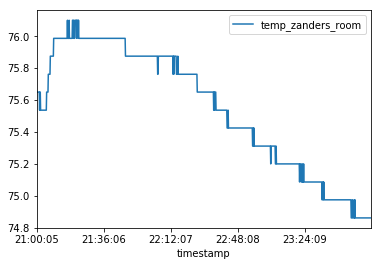

In [351]:
hour_start = 21
hour_end = 7

df1 = temp_data_list[0][1]
df1_name = temp_data_list[0][0]
df2 = temp_data_list[1][1]
df2_name = temp_data_list[1][0]
df3 = temp_data_list[2][1]
df3_name = temp_data_list[2][0]

#print(df1['timestamp'])
df1_1 = df1.loc[(df1['timestamp'] > '21:00:00')]
df1_2 = df1.loc[(df1['timestamp'] < '07:00:20')]
# print(df1_1['timestamp'])
# print(df1_2['timestamp'])


df1_1.append(df1_2)
df1_1.info()
df1_1.set_index('timestamp', inplace=True)
df1_1.plot()
# df_new = pd.concat([ df1_1, df1_2 ], axis=1)
# df_new.info()
# df_new.set_index('timestamp', inplace=True)
# df_new.plot(rot=45)

#df_new.plot()
# df2 = df2.loc[>'21:00:01']
# df2.info()
# df3 = df3['21:00:00':'07:00:00']
# df3.info()


# df1[df1.index.duplicated()]

# new_index = pd.date_range(start='2000-01-01 21:00:00', end='2000-01-02 07:00:00', freq="10s")
# df1.reindex(index=new_index)
# df1.info()
# df2.plot()
# df3.plot()

#df_new = pd.concat([ df1[df1_name], df2[df2_name], df3[df3_name] ], axis=1, keys=[df1_name, df2_name, df3_name])
#df_new.plot()

#df_new.info()


In [246]:
ni1 = pd.date_range('21:00', '23:59', freq="10s")
ni2 = pd.date_range('0:00', '07:00', freq="10s")
new_index = ni1.union(ni2)
len(new_index)
new_index

DatetimeIndex(['2018-07-03 00:00:00', '2018-07-03 00:00:10',
               '2018-07-03 00:00:20', '2018-07-03 00:00:30',
               '2018-07-03 00:00:40', '2018-07-03 00:00:50',
               '2018-07-03 00:01:00', '2018-07-03 00:01:10',
               '2018-07-03 00:01:20', '2018-07-03 00:01:30',
               ...
               '2018-07-03 23:57:30', '2018-07-03 23:57:40',
               '2018-07-03 23:57:50', '2018-07-03 23:58:00',
               '2018-07-03 23:58:10', '2018-07-03 23:58:20',
               '2018-07-03 23:58:30', '2018-07-03 23:58:40',
               '2018-07-03 23:58:50', '2018-07-03 23:59:00'],
              dtype='datetime64[ns]', length=3596, freq=None)

In [258]:
pd.date_range(start='2000-01-01 21:00:00', end='2000-01-02 07:00:00', freq="10s")
#pd.timedelta_range(start=pd.Timestamp('2017-01-01'), end=pd.Timestamp('2017-02-01'), freq="10s")

DatetimeIndex(['2000-01-01 21:00:00', '2000-01-01 21:00:10',
               '2000-01-01 21:00:20', '2000-01-01 21:00:30',
               '2000-01-01 21:00:40', '2000-01-01 21:00:50',
               '2000-01-01 21:01:00', '2000-01-01 21:01:10',
               '2000-01-01 21:01:20', '2000-01-01 21:01:30',
               ...
               '2000-01-02 06:58:30', '2000-01-02 06:58:40',
               '2000-01-02 06:58:50', '2000-01-02 06:59:00',
               '2000-01-02 06:59:10', '2000-01-02 06:59:20',
               '2000-01-02 06:59:30', '2000-01-02 06:59:40',
               '2000-01-02 06:59:50', '2000-01-02 07:00:00'],
              dtype='datetime64[ns]', length=3601, freq='10S')